# Interactive Web Maps of COVID19 data in Python

## Libraries

For this session, we will be using two libraries: folium and altair. Make sure to install the libraries using `pip` or `conda`. If you have reached this Jupyter notebook via the IDRE GitHub page, or, if you installed Anaconda and ran `requirements.txt`, your library should already be installed. If not, uncomment the install code below and run them.


In [ ]:
# !conda install -c conda-forge folium

Some resources:
* official folium documentation: https://python-visualization.github.io/folium/index.html 
* https://coderzcolumn.com/tutorials/data-science/interactive-maps-choropleth-scattermap-using-folium
* a simple jupyter notebook with examples: https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Features.ipynb
* choropleth mapping: https://coderzcolumn.com/tutorials/data-science/interactive-maps-choropleth-scattermap-using-folium
* working with geopandas: http://andrewgaidus.com/leaflet_webmaps_python/

Import the folium library.

In [2]:
import folium

Create your first interactive map using the `folium.Map()` command. Notice the following common arguments:
* `location` is an array of [latitute, longitude]
* `zoom_start` is the default zoom level, 0 being the entire planet, 16 being very zoomed in (block level)
* `control_scale` adds a scale to the map

In [4]:
# Create a Map instance
map = folium.Map(location=[34,-118], 
               zoom_start=8, 
               control_scale=True
                )

map

You can choose to display a different basemap using the `tiles` property:
* `OpenStreetMap`
* `Stamen` (Terrain, Toner, and Watercolor)
* `CartoDB` (positron and dark_matter)

In [5]:
# Create a Map instance with different basemap
map = folium.Map(location=[34,-118], 
               zoom_start=8, 
               control_scale=True,
               height=400,
               tiles='CartoDB dark_matter',
               attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')
map

## Vector layers
You can add vector layers, that is, markers (points), circles, to the map. Here, we will add a `folium.CircleMarker()`.
https://python-visualization.github.io/folium/modules.html#module-folium.vector_layers

In [8]:
# add a circle
folium.Circle(
    radius=10000,
    location=[34,-118],
    color='crimson',
    fill=False,
).add_to(map)
map

Reset the map by calling and recreating folium.Map() once again:

In [ ]:
# reset the map (only way to get rid of circles)
map = folium.Map(location=[34,-118], 
                zoom_start=8, 
                control_scale=True,
                height=400,
                tiles='CartoDB dark_matter',
                attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')

## Adding data to the interactive map
Now that we know how to create an interactive map, let's add some data using the `pandas` library. We will grab the `latimes-place-totals` data table from the LA Times.

In [9]:
# get latimes covid19 data
import pandas as pd

latimes = pd.read_csv(
    "https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv"
)
latimes


date       county  fips            place  confirmed_cases note  \
0      2020-07-18      Alameda   1.0  Address Unknown               37  NaN   
1      2020-07-18      Alameda   1.0          Alameda              145  NaN   
2      2020-07-18      Alameda   1.0           Albany               26  NaN   
3      2020-07-18      Alameda   1.0         Berkeley              313  NaN   
4      2020-07-18      Alameda   1.0           Dublin               98  NaN   
...           ...          ...   ...              ...              ...  ...   
81365  2020-03-16  Los Angeles  37.0       West Adams                1  NaN   
81366  2020-03-16  Los Angeles  37.0       West Hills                3  NaN   
81367  2020-03-16  Los Angeles  37.0   West Hollywood                5  NaN   
81368  2020-03-16  Los Angeles  37.0      West Vernon                1  NaN   
81369  2020-03-16  Los Angeles  37.0      Westchester                1  NaN   

                x          y  
0             NaN        NaN  
1     -122.274444  37.756111  
2     -122.297778  37.886944  
3     -122.272778  37.871667  
4     -121.935833  37.702222  
...           ...        ...  
81365 -118.307847  34.035612  
81366 -118.636070  34.211472  
81367 -118.371765  34.088278  
81368 -118.300192  34.000114  
81369 -118.406070  33.952357  

[81370 rows x 8 columns]

In [11]:
# create a subset dataset for a single day in Los Angeles
latimes_today = latimes.query("date == '2020-07-18' & county == 'Los Angeles'")
latimes_today

date       county  fips            place  confirmed_cases note  \
121  2020-07-18  Los Angeles  37.0            Acton               37  NaN   
122  2020-07-18  Los Angeles  37.0  Adams-Normandie              143  NaN   
123  2020-07-18  Los Angeles  37.0     Agoura Hills               89  NaN   
124  2020-07-18  Los Angeles  37.0       Agua Dulce               15  NaN   
125  2020-07-18  Los Angeles  37.0         Alhambra              699  NaN   
..          ...          ...   ...              ...              ...  ...   
446  2020-07-18  Los Angeles  37.0       Wilmington              930  NaN   
447  2020-07-18  Los Angeles  37.0  Wilshire Center              647  NaN   
448  2020-07-18  Los Angeles  37.0         Winnetka              698  NaN   
449  2020-07-18  Los Angeles  37.0         Wiseburn               72  NaN   
450  2020-07-18  Los Angeles  37.0   Woodland Hills              491  NaN   

              x          y  
121 -118.216138  34.481366  
122 -118.302397  34.029122  
123 -118.760876  34.151007  
124 -118.323810  34.497963  
125 -118.135504  34.083961  
..          ...        ...  
446 -118.253276  33.785869  
447 -118.295338  34.068376  
448 -118.575929  34.213111  
449 -118.365742  33.909520  
450 -118.604522  34.166350  

[330 rows x 8 columns]

Check the data with a simple panda plot.

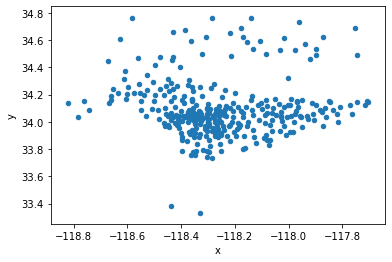

In [15]:
latimes_today.plot(x ='x', y='y', kind = 'scatter')

## Let's chart with altair
* altair documentation: https://altair-viz.github.io/getting_started/overview.html

In [16]:
import altair as alt

In [17]:
# reset the map (only way to get rid of circles)
map = folium.Map(location=[34,-118], 
                zoom_start=8, 
                control_scale=True,
                height=400,
                tiles='CartoDB dark_matter',
                attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')

# create a function to create circles, and also add a chart in the popup window (a lot here, will break it up later)
def createCircle(lat,lon,size,place,label):
    bar = alt.Chart(latimes.query('place == @place')).mark_bar().encode(
    #     x='date',
        x=alt.X('date', axis=alt.Axis(labels=False)),
        y='confirmed_cases',
        color='confirmed_cases',
        tooltip = ['date','place','confirmed_cases']
    ).properties(width=400,height=200)

    vega = folium.features.VegaLite(
        bar,
        width=600,
        height=200,
    )

    circle = folium.Circle(
        radius=size,
        location=[lat,lon],
        tooltip = label,
        color='crimson',
        fill = True
    )

    popup = folium.Popup()
    vega.add_to(popup)
    popup.add_to(circle)
    
    circle.add_to(map)
    

In [18]:
# loop through the rows in Los Angeles, and create a circle based on confirmed cases
for index, row in latimes_today.iterrows():
    label = str(row['confirmed_cases']) + ' confirmed cases in ' + row['place']
    createCircle(row['y'],row['x'],row['confirmed_cases'],row['place'],label)

In [19]:
map